**Exploitory Data Analysis**

This notebook trains a LSTM model that predicts the bid price of **EURUSD** 15 minutes in the future by looking at last five hours of data. While there is no requirement for the input to be contiguous, it's been empirically observed that having the contiguous input does improve the accuracy of the model. I suspect that having *day of the week* and *hour of the day* as the features mitigates some of the seasonality and contiguousness problems.

In [42]:
%matplotlib inline
# Imports
#import talib as ta
from pandas_datareader import data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime



#from alpha_vantage.timeseries import TimeSeries
#import fix_yahoo_finance

from subprocess import check_output

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001C30BE17390>>
Traceback (most recent call last):
  File "C:\Users\choon\Anaconda3\lib\site-packages\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [43]:
df = pd.read_csv('newnew_eurusd.csv')
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df

,28/5/2018 20:45,1.16266,1.16267,1.16256,1.16259
0,28/5/2018 20:46,1.16262,1.16265,1.16248,1.16253
1,28/5/2018 20:47,1.16252,1.16256,1.16249,1.16250
2,28/5/2018 20:48,1.16251,1.16256,1.16249,1.16250
3,28/5/2018 20:49,1.16251,1.16255,1.16243,1.16244
4,28/5/2018 20:50,1.16245,1.16247,1.16232,1.16239
5,28/5/2018 20:51,1.16240,1.16245,1.16235,1.16245
6,28/5/2018 20:52,1.16244,1.16250,1.16236,1.16240
7,28/5/2018 20:53,1.16237,1.16239,1.16233,1.16235
8,28/5/2018 20:54,1.16236,1.16266,1.16235,1.16253
9,28/5/2018 20:55,1.16249,1.16265,1.16249,1.16249


Renaming the Column headers

In [44]:

df.columns = ["Date", "Open", "High", "Close","Low"]
df

,Date,Open,High,Close,Low
0,28/5/2018 20:46,1.16262,1.16265,1.16248,1.16253
1,28/5/2018 20:47,1.16252,1.16256,1.16249,1.16250
2,28/5/2018 20:48,1.16251,1.16256,1.16249,1.16250
3,28/5/2018 20:49,1.16251,1.16255,1.16243,1.16244
4,28/5/2018 20:50,1.16245,1.16247,1.16232,1.16239
5,28/5/2018 20:51,1.16240,1.16245,1.16235,1.16245
6,28/5/2018 20:52,1.16244,1.16250,1.16236,1.16240
7,28/5/2018 20:53,1.16237,1.16239,1.16233,1.16235
8,28/5/2018 20:54,1.16236,1.16266,1.16235,1.16253
9,28/5/2018 20:55,1.16249,1.16265,1.16249,1.16249


Changing the date from the string format to a datetime format and setting it as the index column

In [45]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
#df.set_index('Date', inplace=True)


In [46]:
df.index

df['Date'] = pd.to_datetime(df['Date'] ,infer_datetime_format=True)
df.set_index('Date', inplace=True)

Here, the range , average price , open-high-low-close prices are charted for exploitory data analysis purposes. 

In [47]:

df['hour'] = df.index.hour
df['day']  = df.index.weekday
df['week'] = df.index.week
df['avg_price'] = (df['Low'] + df['High'])/2
df['range']     = df['High'] - df['Low']
df['ohlc_price'] = (df['Low'] + df['High'] + df['Open'] + df['Close'])/4
df['oc_diff']    = df['Open'] - df['Close']
#df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod=14)
df['SMA'] = df['Close'].rolling(window=5).mean()
df['percentage_change'] = (df['Close'] - df['Open']) / df['Open']  # Percentage change in price for the day
df['cp_change'] = (df['Close'] - df['Close'].shift(1)) / (
df['Close'].shift(1))  # Change in closing price from the previous day

## to get RSI value
delta = df["Close"].diff()
window = 15
up_days = delta.copy()
up_days[delta<=0]=0.0
down_days = abs(delta.copy())
down_days[delta>0]=0.0
RS_up = up_days.rolling(window).mean()
RS_down = down_days.rolling(window).mean()
rsi= 100-100/(1+RS_up/RS_down)
df['RSI'] = rsi

ATR1 = abs (df['High'] - df['Low'])
ATR2 = abs (df['High'] - 
df['Close'].shift())
ATR3 = abs (df['Low'] - df['Close'].shift())
ATR = pd.DataFrame(ATR1)
ATR['ATR2'] = ATR2
ATR['ATR3'] = ATR3
ATR = ATR.max(axis=1)
ATR = ATR.rolling(14).mean()
df['ATR'] = ATR

df

,Open,High,Close,Low,hour,day,week,avg_price,range,ohlc_price,oc_diff,SMA,percentage_change,cp_change,RSI,ATR
Date,,,,,,,,,,,,,,,,
2018-05-28 20:46:00,1.16262,1.16265,1.16248,1.16253,20,0,22,1.162590,0.00012,1.162570,0.00014,NaN,-0.000120,NaN,NaN,NaN
2018-05-28 20:47:00,1.16252,1.16256,1.16249,1.16250,20,0,22,1.162530,0.00006,1.162518,0.00003,NaN,-0.000026,0.000009,NaN,NaN
2018-05-28 20:48:00,1.16251,1.16256,1.16249,1.16250,20,0,22,1.162530,0.00006,1.162515,0.00002,NaN,-0.000017,0.000000,NaN,NaN
2018-05-28 20:49:00,1.16251,1.16255,1.16243,1.16244,20,0,22,1.162495,0.00011,1.162482,0.00008,NaN,-0.000069,-0.000052,NaN,NaN
2018-05-28 20:50:00,1.16245,1.16247,1.16232,1.16239,20,0,22,1.162430,0.00008,1.162408,0.00013,1.162442,-0.000112,-0.000095,NaN,NaN
2018-05-28 20:51:00,1.16240,1.16245,1.16235,1.16245,20,0,22,1.162450,0.00000,1.162413,0.00005,1.162416,-0.000043,0.000026,NaN,NaN
2018-05-28 20:52:00,1.16244,1.16250,1.16236,1.16240,20,0,22,1.162450,0.00010,1.162425,0.00008,1.162390,-0.000069,0.000009,NaN,NaN
2018-05-28 20:53:00,1.16237,1.16239,1.16233,1.16235,20,0,22,1.162370,0.00004,1.162360,0.00004,1.162358,-0.000034,-0.000026,NaN,NaN
2018-05-28 20:54:00,1.16236,1.16266,1.16235,1.16253,20,0,22,1.162595,0.00013,1.162475,0.00001,1.162342,-0.000009,0.000017,NaN,NaN


In [48]:
#df['SMA'] = pd.to_numeric(df['SMA'])
df['SMA'] = df['SMA'].fillna(method = 'bfill')
df['cp_change'] = df['cp_change'].fillna(method = 'bfill')
df['RSI'] = df['RSI'].fillna(method='bfill')
df['ATR'] = df['ATR'].fillna(method = 'bfill')
df

,Open,High,Close,Low,hour,day,week,avg_price,range,ohlc_price,oc_diff,SMA,percentage_change,cp_change,RSI,ATR
Date,,,,,,,,,,,,,,,,
2018-05-28 20:46:00,1.16262,1.16265,1.16248,1.16253,20,0,22,1.162590,0.00012,1.162570,0.00014,1.162442,-0.000120,0.000009,50.515464,0.000150
2018-05-28 20:47:00,1.16252,1.16256,1.16249,1.16250,20,0,22,1.162530,0.00006,1.162518,0.00003,1.162442,-0.000026,0.000009,50.515464,0.000150
2018-05-28 20:48:00,1.16251,1.16256,1.16249,1.16250,20,0,22,1.162530,0.00006,1.162515,0.00002,1.162442,-0.000017,0.000000,50.515464,0.000150
2018-05-28 20:49:00,1.16251,1.16255,1.16243,1.16244,20,0,22,1.162495,0.00011,1.162482,0.00008,1.162442,-0.000069,-0.000052,50.515464,0.000150
2018-05-28 20:50:00,1.16245,1.16247,1.16232,1.16239,20,0,22,1.162430,0.00008,1.162408,0.00013,1.162442,-0.000112,-0.000095,50.515464,0.000150
2018-05-28 20:51:00,1.16240,1.16245,1.16235,1.16245,20,0,22,1.162450,0.00000,1.162413,0.00005,1.162416,-0.000043,0.000026,50.515464,0.000150
2018-05-28 20:52:00,1.16244,1.16250,1.16236,1.16240,20,0,22,1.162450,0.00010,1.162425,0.00008,1.162390,-0.000069,0.000009,50.515464,0.000150
2018-05-28 20:53:00,1.16237,1.16239,1.16233,1.16235,20,0,22,1.162370,0.00004,1.162360,0.00004,1.162358,-0.000034,-0.000026,50.515464,0.000150
2018-05-28 20:54:00,1.16236,1.16266,1.16235,1.16253,20,0,22,1.162595,0.00013,1.162475,0.00001,1.162342,-0.000009,0.000017,50.515464,0.000150


In [49]:
# Add PCA as a feature instead of for reducing the dimensionality. This improves the accuracy a bit.
from sklearn.decomposition import PCA

dataset = df.copy().values.astype('float32')
pca_features = df.columns.tolist()

pca = PCA(n_components=1)
df['pca'] = pca.fit_transform(dataset)

In [50]:
df

,Open,High,Close,Low,hour,day,week,avg_price,range,ohlc_price,oc_diff,SMA,percentage_change,cp_change,RSI,ATR,pca
Date,,,,,,,,,,,,,,,,,
2018-05-28 20:46:00,1.16262,1.16265,1.16248,1.16253,20,0,22,1.162590,0.00012,1.162570,0.00014,1.162442,-0.000120,0.000009,50.515464,0.000150,-0.247273
2018-05-28 20:47:00,1.16252,1.16256,1.16249,1.16250,20,0,22,1.162530,0.00006,1.162518,0.00003,1.162442,-0.000026,0.000009,50.515464,0.000150,-0.247356
2018-05-28 20:48:00,1.16251,1.16256,1.16249,1.16250,20,0,22,1.162530,0.00006,1.162515,0.00002,1.162442,-0.000017,0.000000,50.515464,0.000150,-0.247356
2018-05-28 20:49:00,1.16251,1.16255,1.16243,1.16244,20,0,22,1.162495,0.00011,1.162482,0.00008,1.162442,-0.000069,-0.000052,50.515464,0.000150,-0.247356
2018-05-28 20:50:00,1.16245,1.16247,1.16232,1.16239,20,0,22,1.162430,0.00008,1.162408,0.00013,1.162442,-0.000112,-0.000095,50.515464,0.000150,-0.247356
2018-05-28 20:51:00,1.16240,1.16245,1.16235,1.16245,20,0,22,1.162450,0.00000,1.162413,0.00005,1.162416,-0.000043,0.000026,50.515464,0.000150,-0.247356
2018-05-28 20:52:00,1.16244,1.16250,1.16236,1.16240,20,0,22,1.162450,0.00010,1.162425,0.00008,1.162390,-0.000069,0.000009,50.515464,0.000150,-0.247356
2018-05-28 20:53:00,1.16237,1.16239,1.16233,1.16235,20,0,22,1.162370,0.00004,1.162360,0.00004,1.162358,-0.000034,-0.000026,50.515464,0.000150,-0.247356
2018-05-28 20:54:00,1.16236,1.16266,1.16235,1.16253,20,0,22,1.162595,0.00013,1.162475,0.00001,1.162342,-0.000009,0.000017,50.515464,0.000150,-0.247356


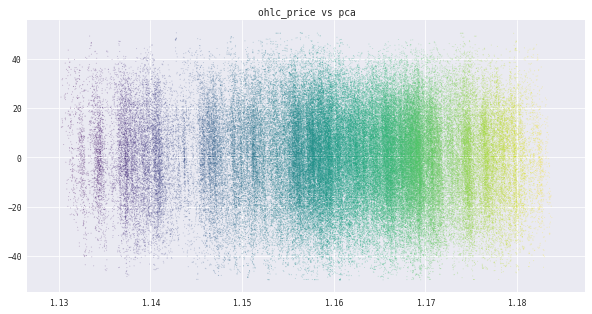

In [51]:
import matplotlib.colors as colors
import matplotlib.cm as cm
import pylab

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['ohlc_price'].values.min(), df['ohlc_price'].values.max())
color = cm.viridis(norm(df['ohlc_price'].values))
plt.scatter(df['ohlc_price'].values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('ohlc_price vs pca')
plt.show()

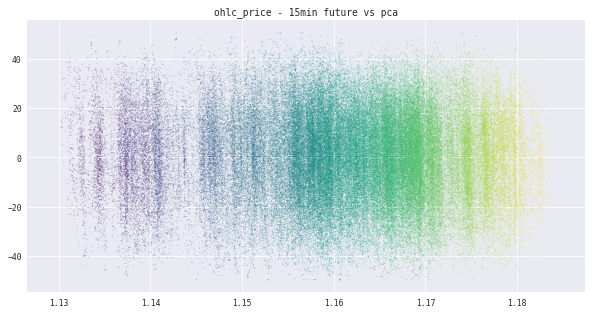

In [52]:
plt.figure(figsize=(10,5))
norm = colors.Normalize(df['ohlc_price'].values.min(), df['ohlc_price'].values.max())
color = cm.viridis(norm(df['ohlc_price'].values))
plt.scatter(df['ohlc_price'].shift().values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('ohlc_price - 15min future vs pca')
plt.show()


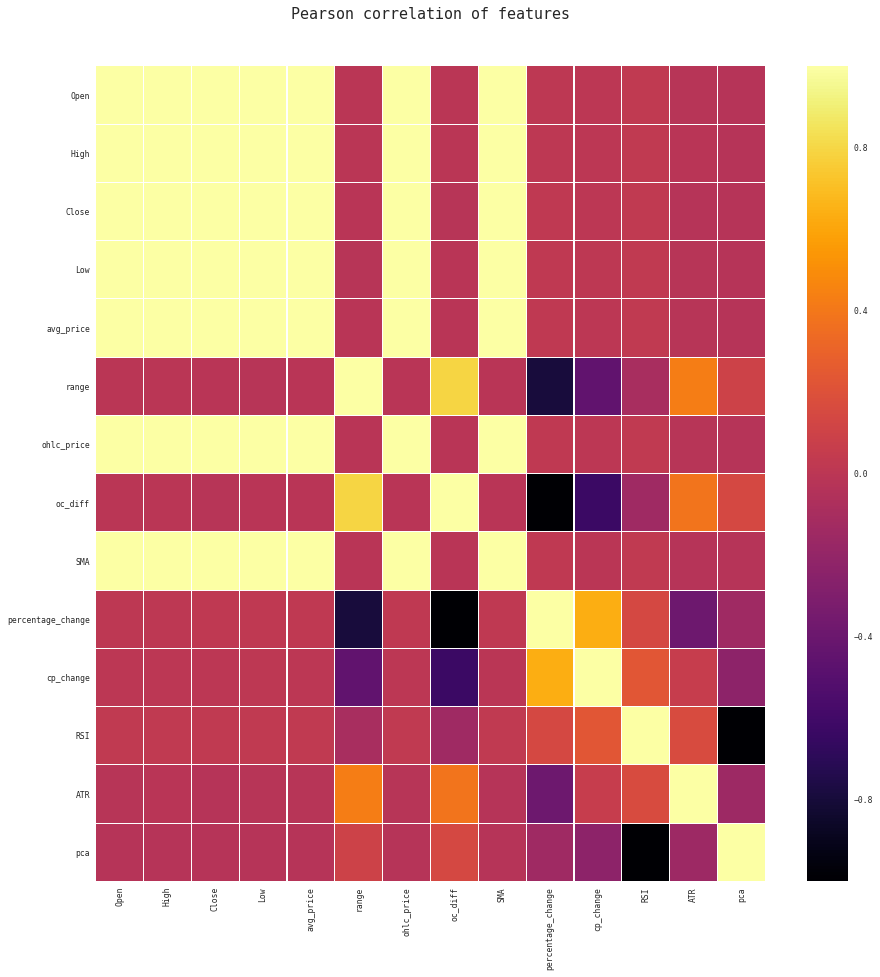

In [53]:
colormap = plt.cm.inferno
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of features', y=1.05, size=15)
corrmat = df.drop(["hour", "day", "week"], axis=1).corr(method='pearson', min_periods=1000)
sns.set(font ="monospace" , context = "paper")
sns.heatmap(corrmat, linewidths=0.1, vmax=1.0,  cmap=colormap,  )
plt.show()


#plt.figure(figsize=(15,5))
#sns.heatmap(corrmat[corrmat.index == 'Close'], linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

In [54]:
df.index.name

'Date'

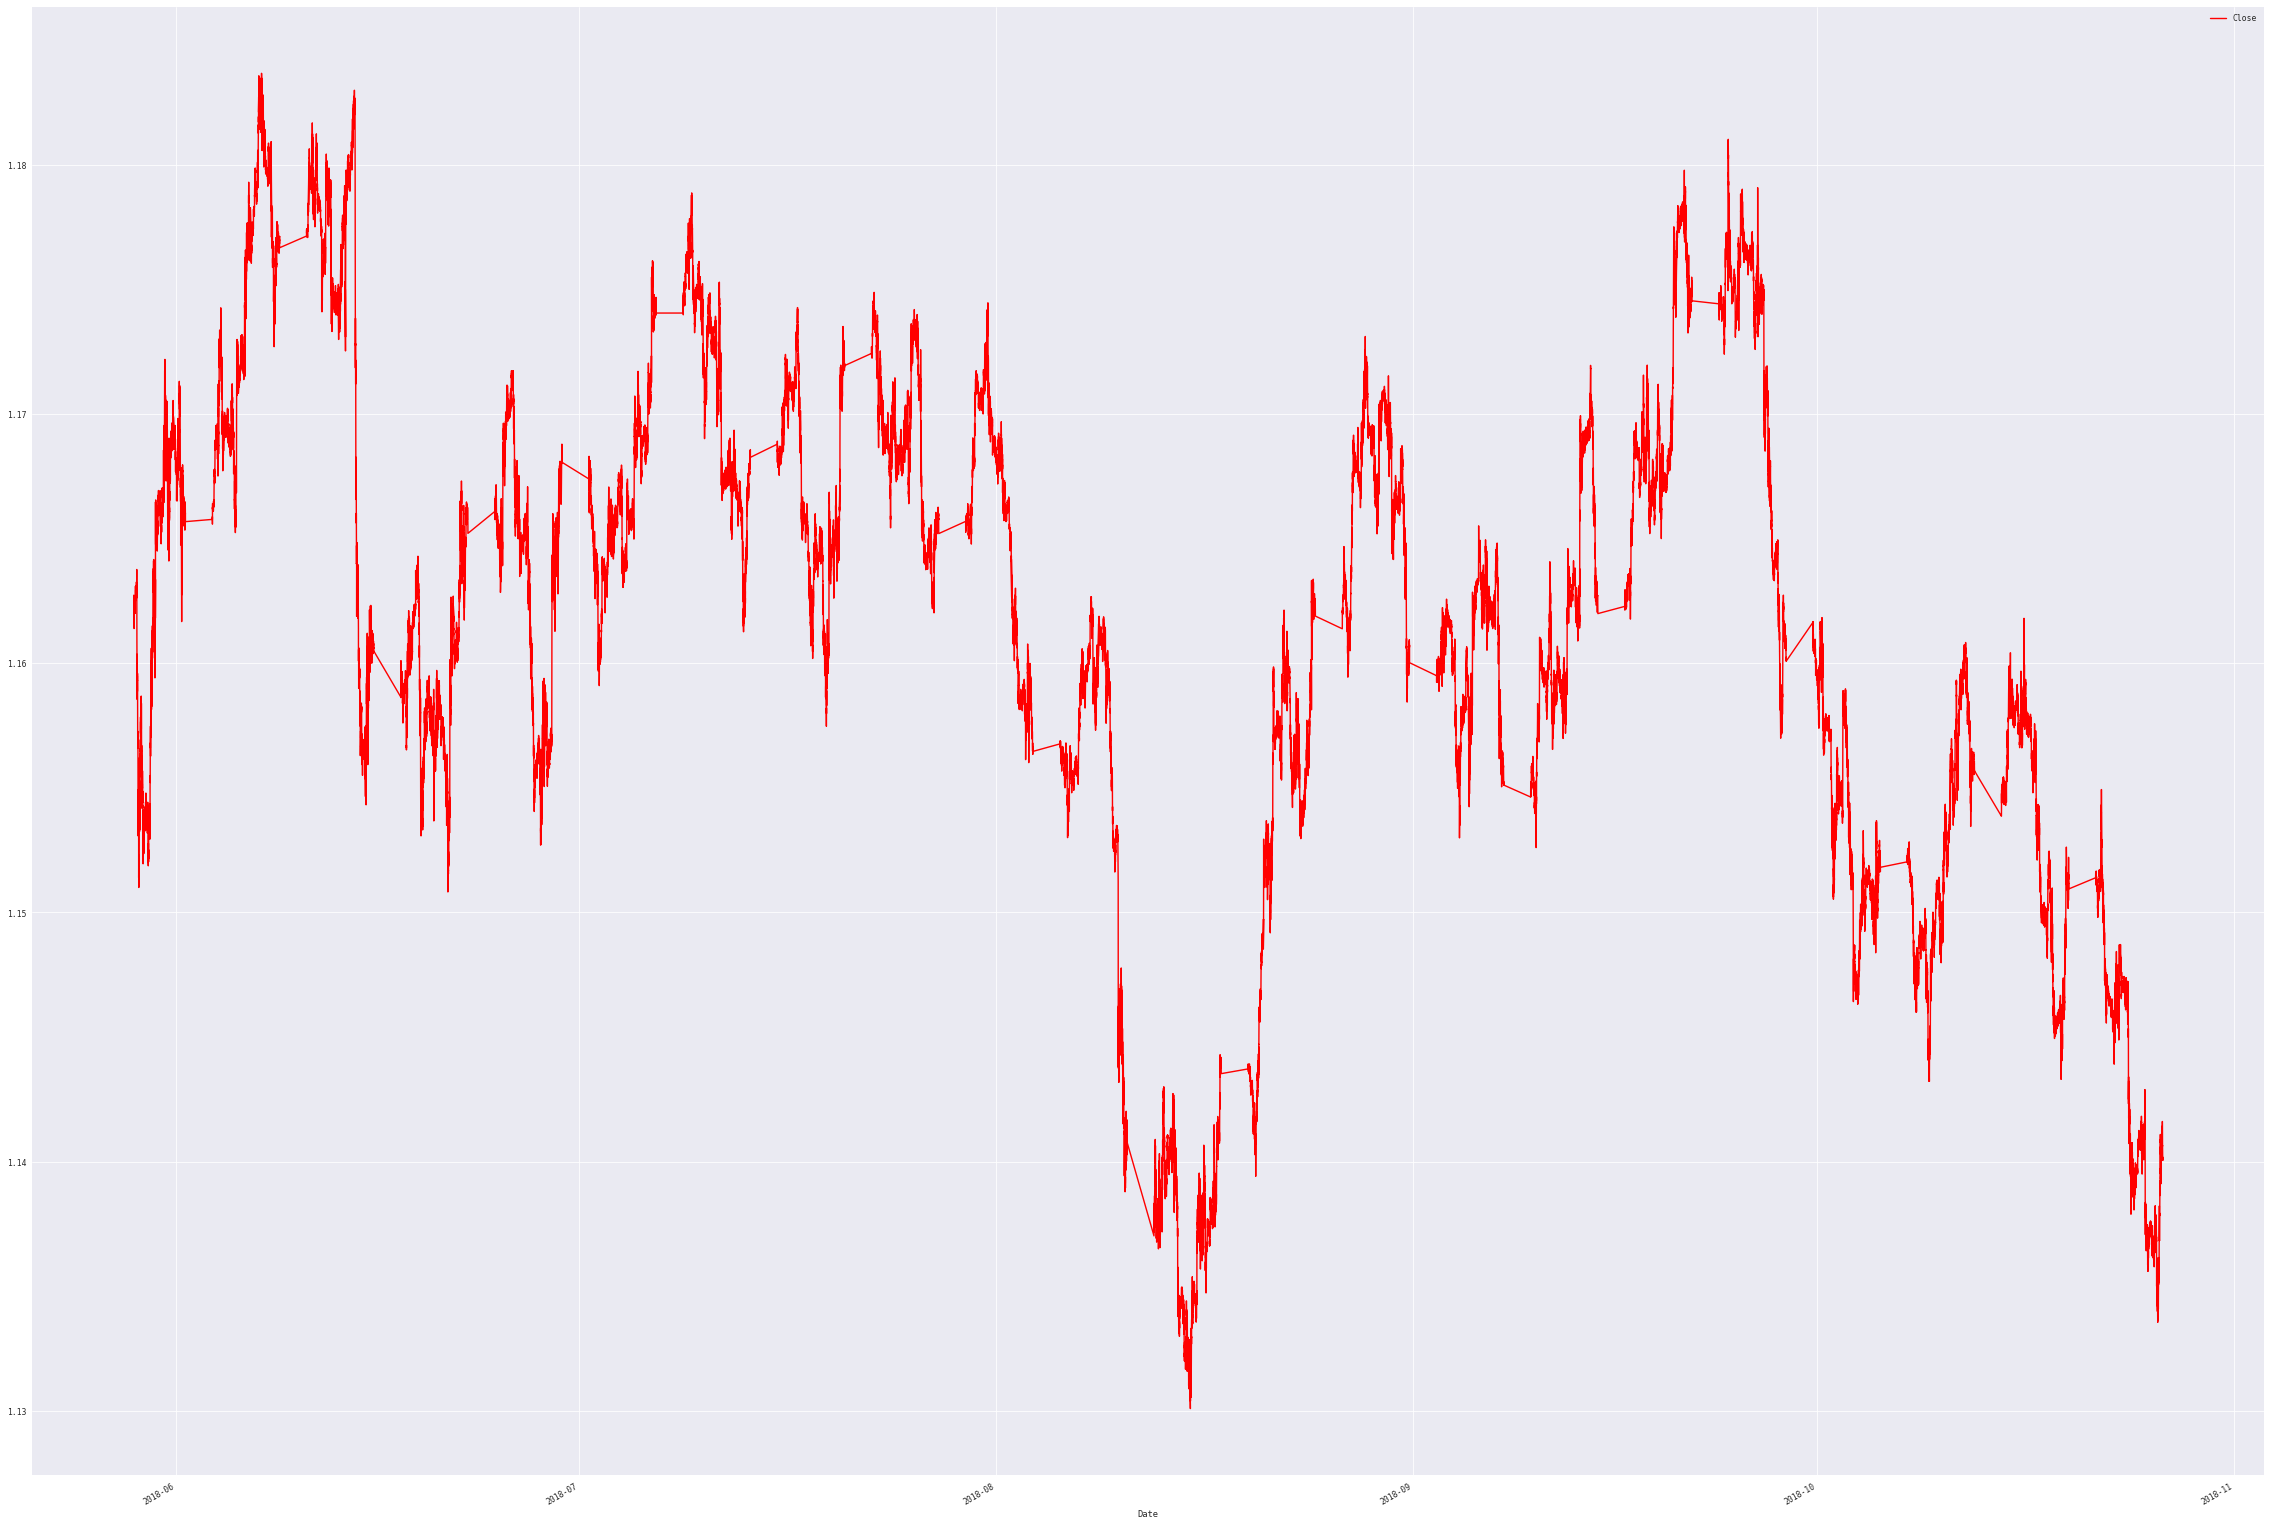

In [55]:
from datetime import datetime
import datetime
df.reset_index(inplace=True)
#rng = pd.date_range(Date(2017,1,1), Date(2018,10,30))
#df = df[rng.intersection(df.columns)]
df
ax = df.plot(x='Date', y='Close', c='red', figsize=(40,30))



Here , we can see that there is enough volatility for the pair of EUR/USD and also there has been a general dip in price and so it is a good chance for us to profit from this pairing.

In [56]:

df['Date'] = pd.to_datetime(df['Date'] ,infer_datetime_format=True)
df.set_index('Date', inplace=True)


In [57]:
dataX =  df.drop(["hour", "day", "week","Close"], axis=1)
dataY = df["Close"]

Scalnig the data so that the values are equally weighted before doing any models

In [58]:
import h5py
def create_dataset(dataset, look_back=20):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)


target_index = df.columns.tolist().index('Close')
high_index = df.columns.tolist().index('High')
low_index = df.columns.tolist().index('Low')
dataset = df.values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Create y_scaler to inverse it later
y_scaler = MinMaxScaler(feature_range=(0, 1))
t_y = df['Close'].values.astype('float32')
t_y = np.reshape(t_y, (-1, 1))
y_scaler = y_scaler.fit(t_y)
    
X, y = create_dataset(dataset, look_back=20)
y = y[:,target_index]


In [59]:
X.shape[1]

20

In [60]:
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled
train, test = train_test_split(df_scaled, test_size=0.2)


In [61]:
trainX =  train.drop(["hour", "day", "week","Close"], axis=1)
trainY = train["Close"]
testX =  test.drop(["hour", "day", "week","Close"], axis=1)
testY = test["Close"]
trainX

,Open,High,Low,avg_price,range,ohlc_price,oc_diff,SMA,percentage_change,cp_change,RSI,ATR,pca
73791,0.540754,0.538013,0.543666,0.540533,0.005115,0.550420,0.000000,0.549030,1.000000,0.615565,0.786667,0.097011,0.214412
86311,0.388408,0.383409,0.387755,0.385179,0.005115,0.393744,0.009434,0.395011,0.990294,0.614036,0.365079,0.077701,0.633701
34701,0.643790,0.638104,0.642949,0.640286,0.028133,0.653268,0.014151,0.657914,0.985614,0.604472,0.198020,0.071724,0.799882
114671,0.703036,0.695169,0.702519,0.698635,0.000000,0.713352,0.000000,0.715185,1.000000,0.606051,0.457143,0.017011,0.542537
47819,0.630911,0.624613,0.628240,0.626179,0.043478,0.638936,0.044811,0.643868,0.954417,0.607630,0.470588,0.168276,0.529689
129284,0.503036,0.496992,0.502666,0.499496,0.000000,0.510364,0.000000,0.510712,1.000000,0.615582,0.562500,0.050115,0.437209
100476,0.577737,0.571194,0.577496,0.574059,0.000000,0.586228,0.002358,0.588733,0.997595,0.604468,0.437500,0.014713,0.561794
87379,0.497148,0.491158,0.495679,0.493084,0.015345,0.503828,0.014151,0.505131,0.985515,0.598106,0.576923,0.036322,0.422855
13624,0.881693,0.883318,0.891524,0.887332,0.010230,0.900187,0.000000,0.894374,1.000000,0.631025,0.485294,0.200000,0.514429
90389,0.438086,0.432634,0.437764,0.434826,0.000000,0.444444,0.000000,0.445202,1.000000,0.607644,0.857143,0.051494,0.143152


In [36]:
train_size = int(len(X) * 0.99)
trainX = X[:train_size]
trainY = y[:train_size]
testX = X[train_size:]
testY = y[train_size:]

In [62]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def build_model_fn(neurons=20, noise=0.25):
    model = Sequential()
    model.add(InputLayer(input_shape=(dataX.shape[1],)))
    model.add(GaussianNoise(noise))
    model.add(Dense(neurons, activation='tanh'))
    model.add(Dense(14, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='nadam', metrics=[r2_keras])
    return model



In [63]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, InputLayer, GaussianNoise
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn=build_model_fn, epochs=75, verbose=0)

gsc = GridSearchCV(
    estimator=model,
    param_grid={
        #'neurons': range(18,31,4),
        'noise': [x/20.0 for x in range(3, 7)],
    },
    #scoring='r2',
    scoring='neg_mean_squared_error',
    cv=5
)

In [64]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(trainX, trainY, feature_names=trainX.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99

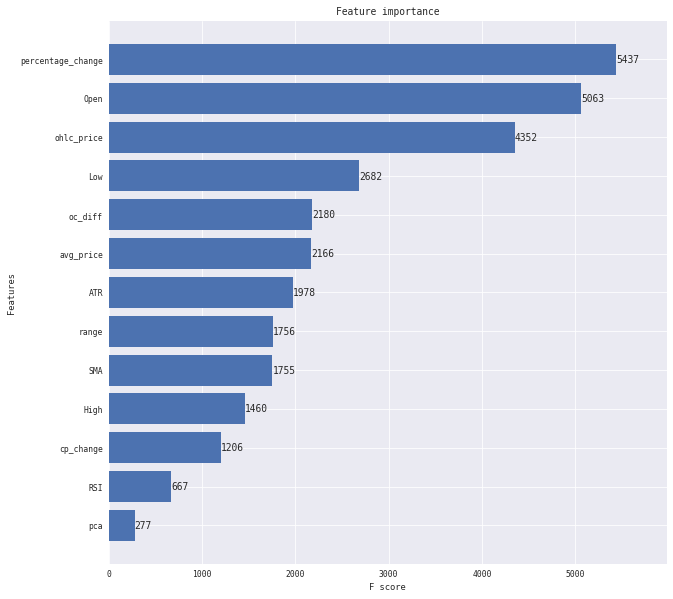

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense

# create a small LSTM network
model = Sequential()
model.add(LSTM(20, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(4, return_sequences=False))
model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 20)            2640      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 20)            3280      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 10)            1240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 10)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 4)                 240       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total para

A simpler check-point strategy is to save the model weights to the same file, if and only if the validation accuracy improves, we can also take this to be a form of reinforced learning

In [ ]:
# Save the best weight during training.
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mean_squared_error', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint]
history = model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=0, callbacks=callbacks_list, validation_split=0.1)

In [ ]:
epoch = len(history.history['loss'])
for k in list(history.history.keys()):
    if 'val' not in k:
        plt.figure(figsize=(50,15))
        plt.plot(history.history[k])
        plt.plot(history.history['val_' + k])
        plt.title(k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [ ]:
min(history.history['val_mean_absolute_error'])

In [ ]:
# Baby the model a bit
# Load the weight that worked the best
model.load_weights("weights.best.hdf5")

# Train again with decaying learning rate
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay]
history = model.fit(trainX, trainY, epochs=int(epoch/3), batch_size=500, verbose=0, callbacks=callbacks_list, validation_split=0.1)

In [ ]:
epoch = len(history.history['loss'])
for k in list(history.history.keys()):
    if 'val' not in k:
        plt.figure(figsize=(40,10))
        plt.plot(history.history[k])
        plt.plot(history.history['val_' + k])
        plt.title(k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()